In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter= '\t', quoting= 3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [4]:
df.shape

(1000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [7]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [8]:
df.describe(include = "object").T

,count,unique,top,freq
Review,1000,996,I won't be back.,2


In [9]:
df['Liked'].value_counts()

0    500
1    500
Name: Liked, dtype: int64

In [10]:
df['Liked'].describe().T

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [11]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [12]:
df[df['Length'] == 100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [14]:
import string
from nltk.corpus import stopwords

In [15]:
stopwords.words('english')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\visha/nltk_data'
    - 'C:\\Users\\visha\\anaconda3\\nltk_data'
    - 'C:\\Users\\visha\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\visha\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\visha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [16]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [17]:
def text_process(msg):
  nopunc = [char for char in msg if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [18]:
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [19]:
df['tokenized_review'] = df['Review'].apply(text_process)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\visha/nltk_data'
    - 'C:\\Users\\visha\\anaconda3\\nltk_data'
    - 'C:\\Users\\visha\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\visha\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\visha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
df.head()

,Review,Liked,Length,tokenized_review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


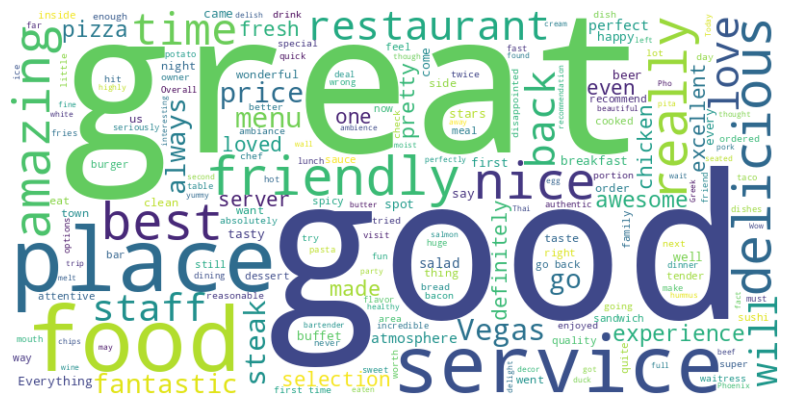

In [ ]:
#positive reviews

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])

#Generating a wordcloud object
wordcloud  = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)

# Display wordcloud using matplotlib

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


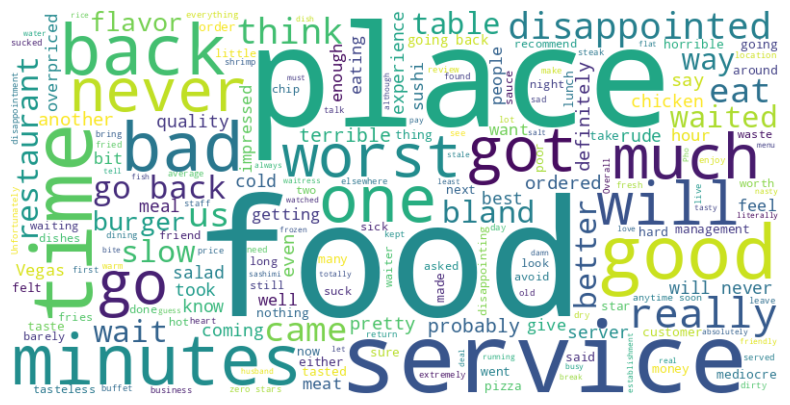

In [ ]:
#negative reviews

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 0,:]
text = ' '.join([text for text in word_cloud['Review']])

#Generating a wordcloud object
wordcloud  = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)

# Display wordcloud using matplotlib

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [ ]:
#Modeling

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(max_df = 0.9, min_df = 10)
X = vectorizer.fit_transform(df['tokenized_review']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['tokenized_review'], df['Liked'], random_state = 107, test_size = 0.2)

In [ ]:
X_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_review, dtype: object

In [ ]:
train_vectorized = vectorizer.transform(X_train)


In [ ]:
test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_train_array = train_vectorized.toarray()
X_test_array = test_vectorized.toarray()

In [ ]:
from sklearn.naive bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_array, y_train)

In [ ]:
y_train_preds_nb = nb.predict(X_train_array)
y_test_preds_nb = nb.predict(X_test_array)

In [ ]:
y_test_preds_nb

In [ ]:
y_test

In [ ]:
pd.Dataframe({'actual_y_value' : y_test, 'predicted_y_value' : y_test_preds_nb})

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report

In [ ]:
def print_metrics(actual,predicted):
    print('accuracy_score is {}'.format(accuracy_score(actual,predicted)))
    print('precision_score is {}'.format(precision_score(actual,predicted)))
    
    print('recall_score is {}'.format(recall_score(actual,predicted)))
    print('f1_score is {}'.format(f1_score(actual,predicted)))
    print('roc_auc_score is {}'.format(roc_auc_score(actual,predicted)))
    print('confusion_matrix is {}'.format(confusion_matrix(actual,predicted)))
    print('classification_report is {}'.format(classification_report(actual,predicted)))
    

In [ ]:
#Evaluation of training model 

print_metrics(y_train, y_train_preds_nb)

In [1]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Multinomial naive bayes algorithm 
mnv = MultinomialNB()
mnv.fit(X_train_array, y_train)

In [ ]:
y_train_preds_mnv = mnv.predict(X_train_array)
y_test_preds_mnv = mnv.predict(X_test_array)

In [ ]:
y_test_preds_mnv

In [ ]:
#Evaluation of MultinomialNB algorithm model 

print_metrics(y_train, y_train_preds_env)

In [ ]:
best_accuracy = 0
alpha_value = 0

for i in np.arange(0.01,1.1,0.1):
    temp_cls = MultinomialNB(alpha = i)
    temp_cls.fit(X_train_array, y_train)
    y_test_preds_h_nbayes = temp_cls.predict(X_test_array)
    score = accuracy_score(y_test, y_test_preds_h_nbayes)
    print('accuracy score for alpha-{} is {}%'.format(round(i,1), round(score * 100, 2)))
    if score > best_accuracy:
        best_accuracy = score 
        alpha_value = i
print('..................................................................................')
print('the best accuracy is {}% with alpha value as {}'.format(round(best_accuracy * 100), round(alpha_val, 1)))
